<a href="https://colab.research.google.com/github/mark1702/mark/blob/master/hoc_may_thong_ke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the and function

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

In [ ]:
for i in range(len(X)):
    print(X[i], y[i])

[0 0] 0
[0 1] 0
[1 0] 0
[1 1] 1


In [ ]:
def add_noise_data(input_data, input_labels, n_points, mean, scale):
    """
    Create a noise verstion of the input data

    Params:
        input_data: base input data
        input_labels: base input labels
        n_points: the number of needed points
        mean, scale: the gaussian data
    """
    raw_X = []
    raw_labels = []

    noise = np.random.normal(loc=mean, scale=scale, size=(n_points, 2))
    for i in range(n_points):
        k = np.random.randint(len(input_data))

        raw_X.append([input_data[k][0] + noise[i][0],
                      input_data[k][1] + noise[i][1]])

        raw_labels.append(input_labels[k])

    return np.array(raw_X), np.array(raw_labels)

In [ ]:
X_noise, y_noise = add_noise_data(X, y, 100, 0., 0.2)

In [ ]:
def plot_clusters(_x, labels, std, list_labels = ['False', 'True']):
    colors = ['#4EACC5', '#FF9C34']
    y_m = labels
    for k, col in zip(range(len(labels)), colors):
        my_members = y_m == k
        print(_x[my_members].shape)
        plt.scatter(_x[my_members, 0], _x[my_members, 1], marker='o', label = list_labels[k])
    plt.title('Noisy AND dataset with std = %.1f' % std)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

(80, 2)
(20, 2)


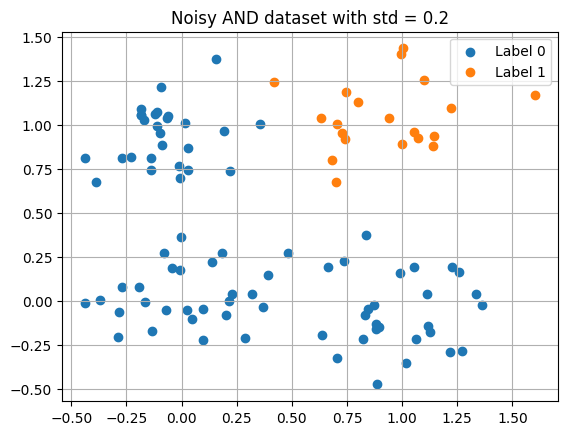

In [ ]:
plot_clusters(X_noise, y_noise, 0.2, list_labels=['Label 0', 'Label 1'])

(144, 2)
(56, 2)


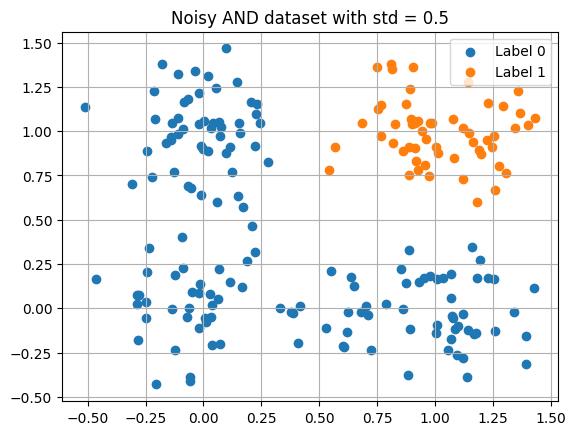

In [ ]:
X_high_noise, y_high_noise = add_noise_data(X, y, 200, 0., 0.2)
plot_clusters(X_high_noise, y_high_noise, 0.5, list_labels=['Label 0', 'Label 1'])

In [ ]:
for i in range(20):
    print('(%.1f, %.1f)' % (X_high_noise[i][0], X_high_noise[i][1]), y_high_noise[i])

(0.6, -0.2) 0
(-0.2, 1.4) 0
(1.2, 0.6) 1
(1.0, 0.2) 0
(-0.1, 0.4) 0
(0.6, -0.1) 0
(-0.2, 0.7) 0
(-0.0, 0.9) 0
(0.0, 1.1) 0
(0.2, 1.2) 0
(0.0, 1.0) 0
(1.0, 0.2) 0
(0.2, 0.3) 0
(1.2, 0.2) 0
(1.3, -0.1) 0
(-0.1, 0.8) 0
(0.7, 1.4) 1
(-0.1, 0.2) 0
(0.0, 0.1) 0
(1.1, 0.8) 1


In [ ]:
for i in range(20):
    print('(%.1f, %.1f)' % (X_high_noise[i][0], X_high_noise[i][1]), y_high_noise[i])


y_high_noise = np.expand_dims(y_high_noise, axis=1)
# print(y_high_noise.shape)

(0.6, -0.2) 0
(-0.2, 1.4) 0
(1.2, 0.6) 1
(1.0, 0.2) 0
(-0.1, 0.4) 0
(0.6, -0.1) 0
(-0.2, 0.7) 0
(-0.0, 0.9) 0
(0.0, 1.1) 0
(0.2, 1.2) 0
(0.0, 1.0) 0
(1.0, 0.2) 0
(0.2, 0.3) 0
(1.2, 0.2) 0
(1.3, -0.1) 0
(-0.1, 0.8) 0
(0.7, 1.4) 1
(-0.1, 0.2) 0
(0.0, 0.1) 0
(1.1, 0.8) 1


# My homework area

In [ ]:
!pip install numpy==1.21.6

  Using cached numpy-1.21.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.21.6 which is incompatible.
flax 0.8.2 requires numpy>=1.22, but you have numpy 1.21.6 which is incompatible.
jax 0.4.23 requires numpy>=1.22, but you have numpy 1.21.6 which is incompatible.
jaxlib 0.4.23+cuda12.cudnn89 requires numpy>=1.22, but you have numpy 1.21.6 which is incompatible.
numba 0.58.1 requires numpy<1.27,>=1.22, but you have numpy 1.21.6 which is incompatible.
plotnine 0.12.4 requires numpy>=1.23.0, but you have numpy 1.21.6 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but

$\textbf{1 Gradient Descent - 10pts}$ <br> <br>
 Let $f(x) = (x_1 - x_2^2 - 3)^2 + (x_1 - x_2 - 1)^2$ and $\lambda = 0.2$. First, calculate $\partial{_{x_i}f}$. Then starting from $x^{(0)} = (-0.5, -0.5)$ (k = 0), apply the gradient descent with k = 1, 2. How many local minimize of f? Could you find it? (3pts)

 -> Not easy to caculate local minimize ^^

 Draw the contour plot of f(x) in question 2, given the appropriated plot domain and visualize gradient descent with $\lambda = 0.01$ and $\lambda = 0.05$ from $x^{(0)} = (5, 5)$, after 10 steps. Which λ value is more optimized? (2pts) <br>

 $f(x) = (x_1 - x_2^2 - 3)^2 + (x_1 - x_2 - 1)^2$ <br>
 $\partial{_{x_1}f} = 4x_1 - 2x_2^2 - 2x_2 - 8$ <br>
 $\partial{_{x_2}f} = 4x_2^3 + 14x_2 - 4x_1x_2 - 2x_1 + 2$

In [34]:
def draw_contours_plot(lr=0.01, iter=10, is_return_local_minimize=False):
  x_1 = -0.5
  x_2 = -0.5
  x_list = [x_1]
  y_list = [x_2]
  local_minimize = []
  bef = 0
  mid = 0
  for i in range(iter):
    try:
      d_x1 = 4 * x_1 - 2 * x_2 ** 2 - 2 * x_2 - 8
      d_x2 = 4 * x_2 ** 3 + 14 * x_2 - 4 * x_1 * x_2 - 2 * x_1 + 2
      x_1 -= lr * d_x1
      x_2 -= lr * d_x2
      z = (x_1 - x_2 ** 2 - 3) ** 2 + (x_1 - x_2 - 1) ** 2
      if i == 0:
        bef = z
      elif i == 1:
        mid = z
      else:
        if mid < bef and mid < z:
          local_minimize.append(mid)
          print(i-1, x_1, x_2)
        bef = mid
        mid = z
      x_list.append(x_1)
      y_list.append(x_2)
    except:
      pass

  xlist = np.array(x_list)
  ylist = np.array(y_list)
  X, Y = np.meshgrid(xlist, ylist)
  Z = np.square(X - np.square(Y) - 3) + np.square(X - Y - 1)
  fig,ax=plt.subplots(1,1)
  cp = ax.contourf(X, Y, Z)
  fig.colorbar(cp)
  ax.set_title('Filled Contours Plot lr: {}'.format(lr))
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  if is_return_local_minimize:
    return local_minimize

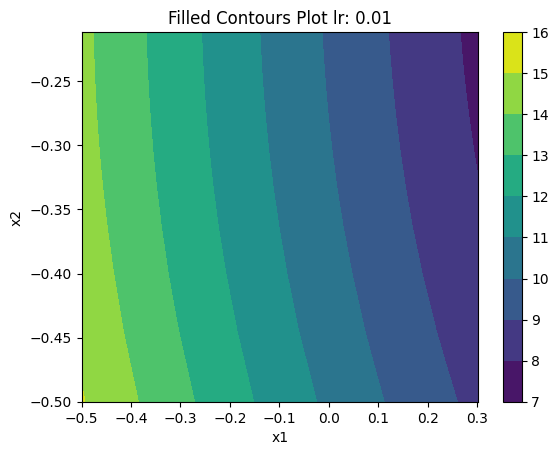

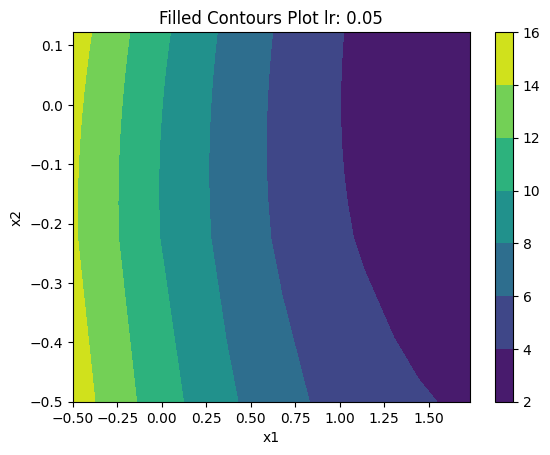

In [35]:
import numpy as np
import matplotlib.pyplot as plt

draw_contours_plot(0.01)
draw_contours_plot(0.05)
plt.show()

In [ ]:
# define active function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
# highlight error points function
def plot_clusters_after_cluster(_x, labels, list_labels = ['False', 'True']):
    colors = ['#4EACC5', '#FF9C34', '#fff899']
    plt.scatter(_x[0], labels[0], marker='o', color=colors[0], label="Label 0 bị phân lớp sai")
    plt.scatter(_x[1], labels[1], marker='o', color=colors[1], label="Label 1  bị phân lớp sai")
    plt.scatter(_x[2], labels[2], marker='o', color=colors[2], label="Label OK")
    # plt.title('Noisy AND dataset with std = %.1f' % std)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

$\textbf{2 Coding Homework - 10pts}$ <br> <br>

1. Suppose we train a logistic regression model follow the ERM framework on the dataset to reach ${\^{err}}_D(h) = 0$. (Hint: Create a table to check the above probability for different running seeds) (5pts) <br>

Some functions: <br>
z = W.T * x + W0 <br>
y_hat = sigmoid(z) <br>
loss = 0.5 * np.square(y_hat - y) <br>
dw = (y_hat - y) * sigmoid(z) * (1 - sigmoid(z)) * X <br>
dw0 = (y_hat - y) * sigmoid(z) * (1 - sigmoid(z)) * 1 <br>

(71, 2)
(29, 2)


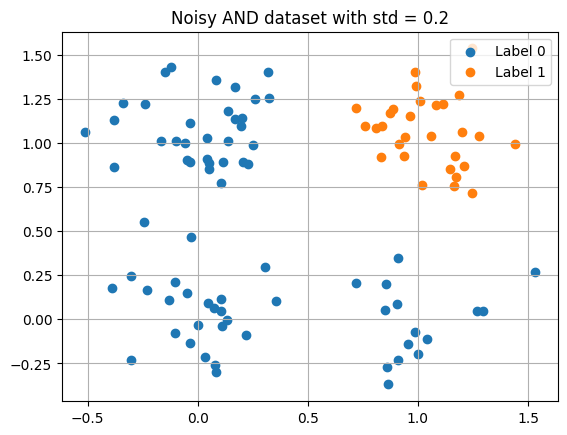

break 671
--------------------


<ipython-input-27-65b90cc0b6d0>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out_array = np.array(out_array)


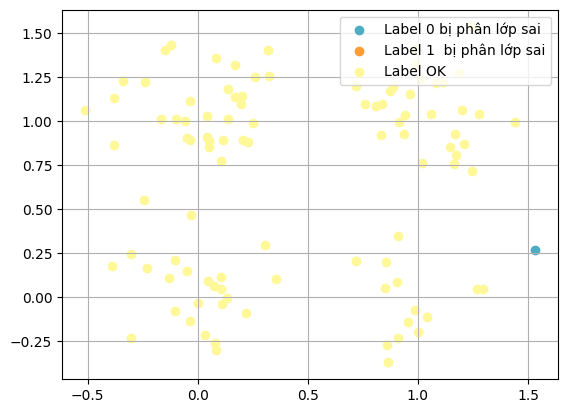

W: [[3.35396603 2.40799691]]
W0: [[-4.62947156]]
Error rate: 0.01


In [ ]:
# create random data
X_high_noise, y_high_noise = add_noise_data(X, y, 100, 0., 0.2)
plot_clusters(X_high_noise, y_high_noise, 0.2, list_labels=['Label 0', 'Label 1'])
y_high_noise_expandims = np.expand_dims(y_high_noise, axis=1)

# let calculate P of
epoch = 1000
lr = 0.01
w0 = np.random.randn(1, 1)
w = np.random.randn(1, 2)

out_array = []
for iter in range(epoch):
    loss = 0
    for idx, x_noise in enumerate(X_high_noise):
        z = np.add(np.dot(x_noise, w.T), w0)
        y_hat = sigmoid(z)
        loss += 0.5 * np.square(y_hat - y_high_noise_expandims[idx])
        dw = (y_hat - y_high_noise_expandims[idx]) * sigmoid(z) * (1 - sigmoid(z)) * x_noise
        dw0 = (y_hat - y_high_noise_expandims[idx]) * sigmoid(z) * (1 - sigmoid(z)) * 1
        w -= lr * dw
        w0 -= lr * dw0
    loss /= len(X_high_noise)
    if loss < 2e-2:
        print(f'break {iter}')
        break
        # if iter == epoch - 1:
        #   out_array.append([x_noise[0], x_noise[1], y_hat[0][0], y_high_noise[idx]])
        # print(f"epoch {iter}: loss:{loss}. Raw {y_high_noise[idx]} Predict {y_hat}")

for idx, x_noise in enumerate(X_high_noise):
    z = np.add(np.dot(x_noise, w.T), w0)
    y_hat = sigmoid(z)
    out_array.append([x_noise[0], x_noise[1], y_hat[0][0], y_high_noise_expandims[idx]])
out_array = np.array(out_array)
x_0_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 0)][:,0]
y_0_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 0)][:,1]
x_1_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 1)][:,0]
y_1_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 1)][:,1]
x_ok = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) <= 0.5)][:,0]
y_ok = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) <= 0.5)][:,1]

print("--------------------")
plot_clusters_after_cluster((x_0_ng, x_1_ng, x_ok), (y_0_ng, y_1_ng, y_ok))
print("W:", w)
print("W0:", w0)
print("Error rate: {}".format((np.absolute(out_array[:,3] - out_array[:,2]) > 0.5).sum() / len(X_high_noise)))

In [ ]:
loop = 10
running_seed = 100
threshold = 0.1
out_array_test = []
avg_error = 0
for iter in range(loop):
    count_err = 0
    avg_error = 0
    for seed in range(running_seed):
        out_array_test.clear()
        X_high_noise, y_high_noise = add_noise_data(X, y, 100, 0., 0.2)
        # plot_clusters(X_high_noise, y_high_noise, 0.2, list_labels=['Label 0', 'Label 1'])
        y_high_noise_expandims = np.expand_dims(y_high_noise, axis=1)
        for idx, x_noise in enumerate(X_high_noise):
            z = np.add(np.dot(x_noise, w.T), w0)
            y_hat = sigmoid(z)
            out_array_test.append([x_noise[0], x_noise[1], y_hat[0][0], y_high_noise_expandims[idx]])
        out_array = np.array(out_array_test)
        x_0_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 0)][:,0]
        y_0_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 0)][:,1]
        x_1_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 1)][:,0]
        y_1_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 1)][:,1]
        x_ok = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) <= 0.5)][:,0]
        y_ok = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) <= 0.5)][:,1]
        # print("--------------------")
        # plot_clusters_after_cluster((x_0_ng, x_1_ng, x_ok), (y_0_ng, y_1_ng, y_ok))
        error_d = (np.absolute(out_array[:,3] - out_array[:,2]) > 0.5).sum() / len(X_high_noise)
        avg_error += error_d
        count_err += 1 if error_d > threshold else 0
    print(f"iter {iter} P_Error: {count_err / running_seed} avg_Error:{avg_error / running_seed}")
    # print("Seed:{} - Error rate: {}".format(seed, ))

<ipython-input-28-7492e778cfa5>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out_array = np.array(out_array_test)


iter 0 P_Error: 0.0 avg_Error:0.03559999999999997
iter 1 P_Error: 0.0 avg_Error:0.03809999999999998
iter 2 P_Error: 0.0 avg_Error:0.03999999999999999
iter 3 P_Error: 0.0 avg_Error:0.036999999999999963
iter 4 P_Error: 0.0 avg_Error:0.037999999999999985
iter 5 P_Error: 0.0 avg_Error:0.03919999999999997
iter 6 P_Error: 0.0 avg_Error:0.03609999999999998
iter 7 P_Error: 0.0 avg_Error:0.03939999999999997
iter 8 P_Error: 0.0 avg_Error:0.037099999999999966
iter 9 P_Error: 0.0 avg_Error:0.03859999999999999


What happened when we increase the number of training samples in $\mathcal{D}$. Validate by your experiments? (2pts)

In [ ]:
def function_change_number_samples(num_sample, std=0.2):
  loop = 1
  running_seed = 100
  threshold = 0.1
  out_array_test = []
  avg_error = 0
  for iter in range(loop):
      count_err = 0
      avg_error = 0
      for seed in range(running_seed):
          out_array_test.clear()
          X_high_noise, y_high_noise = add_noise_data(X, y, num_sample, 0., std)
          # plot_clusters(X_high_noise, y_high_noise, 0.2, list_labels=['Label 0', 'Label 1'])
          y_high_noise_expandims = np.expand_dims(y_high_noise, axis=1)
          for idx, x_noise in enumerate(X_high_noise):
              z = np.add(np.dot(x_noise, w.T), w0)
              y_hat = sigmoid(z)
              out_array_test.append([x_noise[0], x_noise[1], y_hat[0][0], y_high_noise_expandims[idx]])
          out_array = np.array(out_array_test)
          x_0_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 0)][:,0]
          y_0_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 0)][:,1]
          x_1_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 1)][:,0]
          y_1_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 1)][:,1]
          x_ok = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) <= 0.5)][:,0]
          y_ok = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) <= 0.5)][:,1]
          # print("--------------------")
          # plot_clusters_after_cluster((x_0_ng, x_1_ng, x_ok), (y_0_ng, y_1_ng, y_ok))
          error_d = (np.absolute(out_array[:,3] - out_array[:,2]) > 0.5).sum() / len(X_high_noise)
          avg_error += error_d
          count_err += 1 if error_d > threshold else 0
      print(f"iter {iter} P_Error: {count_err / running_seed} avg_Error:{avg_error / running_seed}")

In [ ]:
function_change_number_samples(100)
function_change_number_samples(500)
function_change_number_samples(1000)
function_change_number_samples(1500)
function_change_number_samples(2000)

<ipython-input-31-64cb27c387fe>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out_array = np.array(out_array_test)


iter 0 P_Error: 0.0 avg_Error:0.03839999999999997
iter 0 P_Error: 0.0 avg_Error:0.03765999999999998
iter 0 P_Error: 0.0 avg_Error:0.03759
iter 0 P_Error: 0.0 avg_Error:0.03734666666666668
iter 0 P_Error: 0.0 avg_Error:0.03706500000000001


What happened when we draw the train samples from $\mathcal{N}(0, 0.2)$ and the test samples from $\mathcal{N}(0, 0.3)$ (2pts)

In [ ]:
function_change_number_samples(100, 0.3)
function_change_number_samples(500, 0.3)
function_change_number_samples(1000, 0.3)
function_change_number_samples(1500, 0.3)
function_change_number_samples(2000, 0.3)

<ipython-input-36-a9b85a07a6c0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out_array = np.array(out_array_test)


iter 0 P_Error: 0.34 avg_Error:0.09089999999999994
iter 0 P_Error: 0.26 avg_Error:0.09273999999999993
iter 0 P_Error: 0.14 avg_Error:0.09194
iter 0 P_Error: 0.13 avg_Error:0.09185333333333329
iter 0 P_Error: 0.15 avg_Error:0.09308999999999995
